<a href="https://colab.research.google.com/github/CatrielBartezaghi/3d_images_printing/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enviroment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import math


!pip install imutils
import imutils

os.chdir('/content/drive/MyDrive/PDI - Trabajo de Aplicación - Mapa a CAD - Bartezaghi, López/Imágenes') 

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Segmentación

Usar canny, con consideraciones para las imágenes de entrada
* Que solo tenga bordes
* Que no tenga rios o lagos

Se aplica Canny, al resutado se le aplica un filtro de media aritmética y se umbraliza.

True

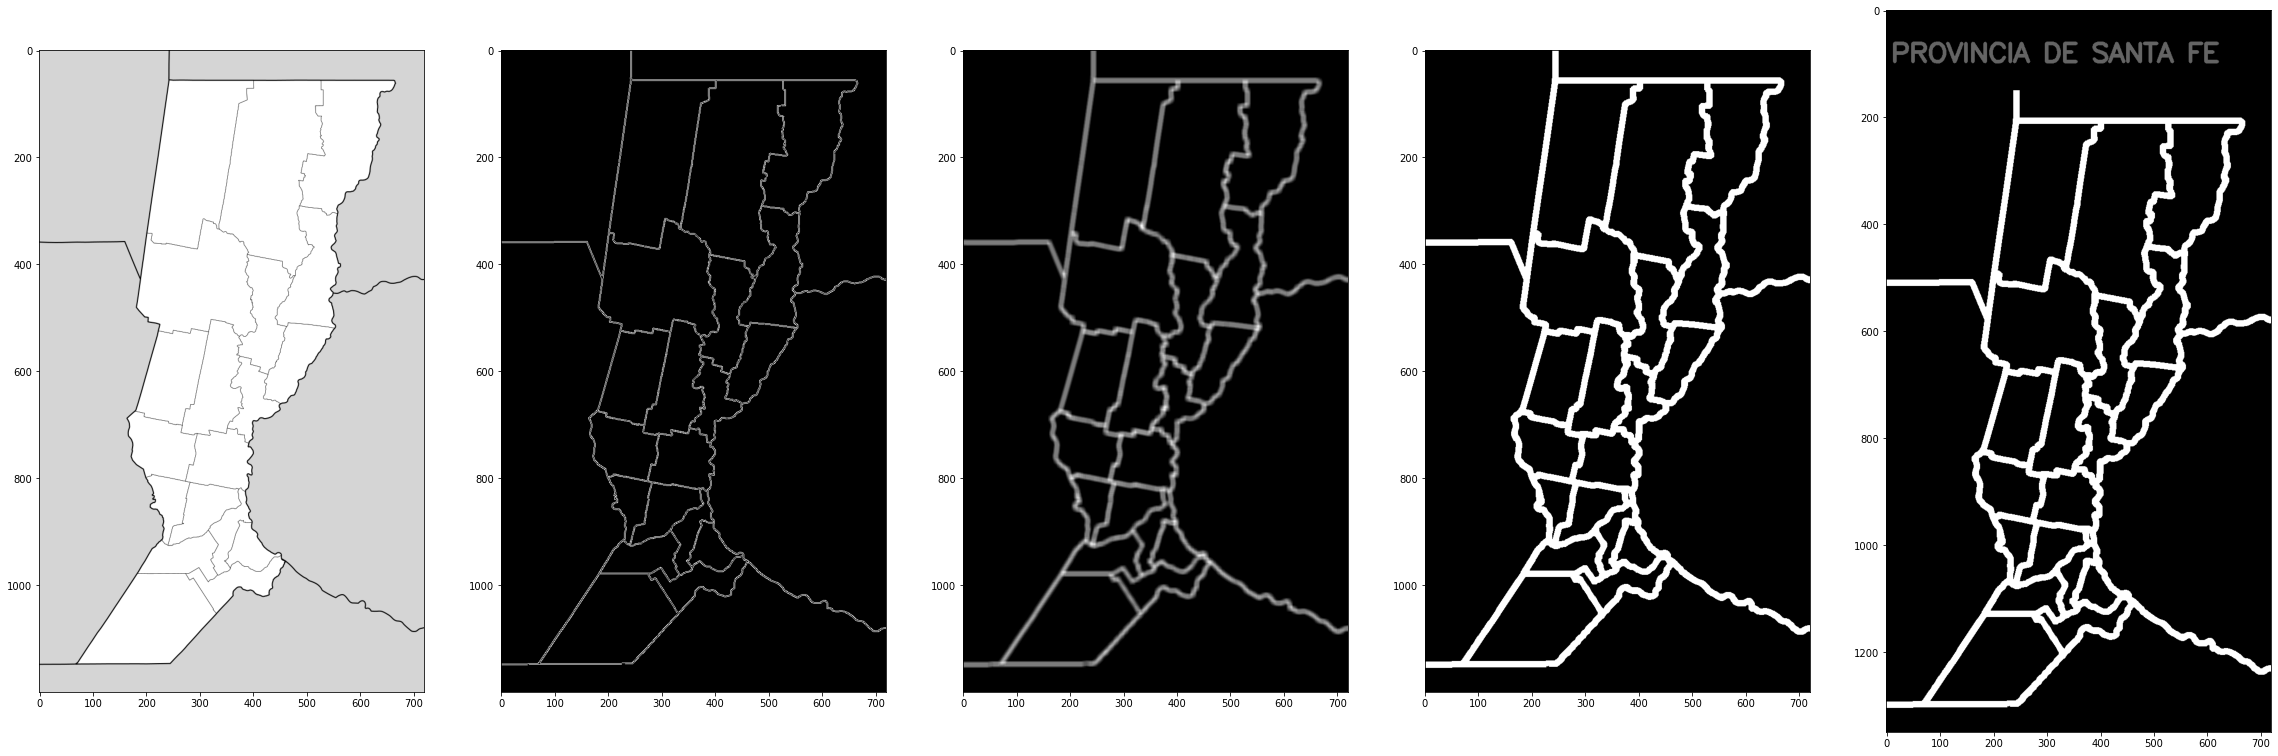

In [2]:
imagen = cv2.imread('/content/drive/MyDrive/PDI - Trabajo de Aplicación - Mapa a CAD - Bartezaghi, López/Imágenes/Santa_Fe_politico_sin_agua.png', cv2.IMREAD_GRAYSCALE)
bordes = cv2.Canny(imagen,200,255) # El mapa es tan simple que con cualquier parámetro Canny segmenta bien
bordes_filt = cv2.blur(bordes,(10,10)) # Mientras mayor es el filtro, más borde tiene la imagen y más suave es la malla del stl
bordes_umb = bordes_filt.copy()
bordes_umb[bordes_umb <= 10] = 0
bordes_umb[bordes_umb > 10] = 255

bordes_txt = bordes_umb.copy()
rect_ceros = np.zeros((bordes_txt.shape[0]//8,bordes_txt.shape[1]))
bordes_txt = np.vstack((rect_ceros, bordes_txt))
cv2.putText(bordes_txt, \
            str('PROVINCIA DE SANTA FE'), \
            (10,bordes_txt.shape[0]//14), \
            0, \
            1.8*bordes_txt.shape[0]/1500, \
            (100,100,100), \
            5*bordes_txt.shape[0]//1000, \
            cv2.FILLED)

fig, ax = plt.subplots(1,5,figsize=(40,40))
ax[0].imshow(imagen, cmap='gray')
ax[1].imshow(bordes, cmap='gray')
ax[2].imshow(bordes_filt, cmap='gray')
ax[3].imshow(bordes_umb, cmap='gray')
ax[4].imshow(bordes_txt, cmap='gray')

cv2.imwrite('Santa_Fe_sin_agua_Canny.png', bordes_txt)

Podemos hacer que el algoritmo plotee solo los bordes o solo la altura, donde cada altura corresponde a un color.

True

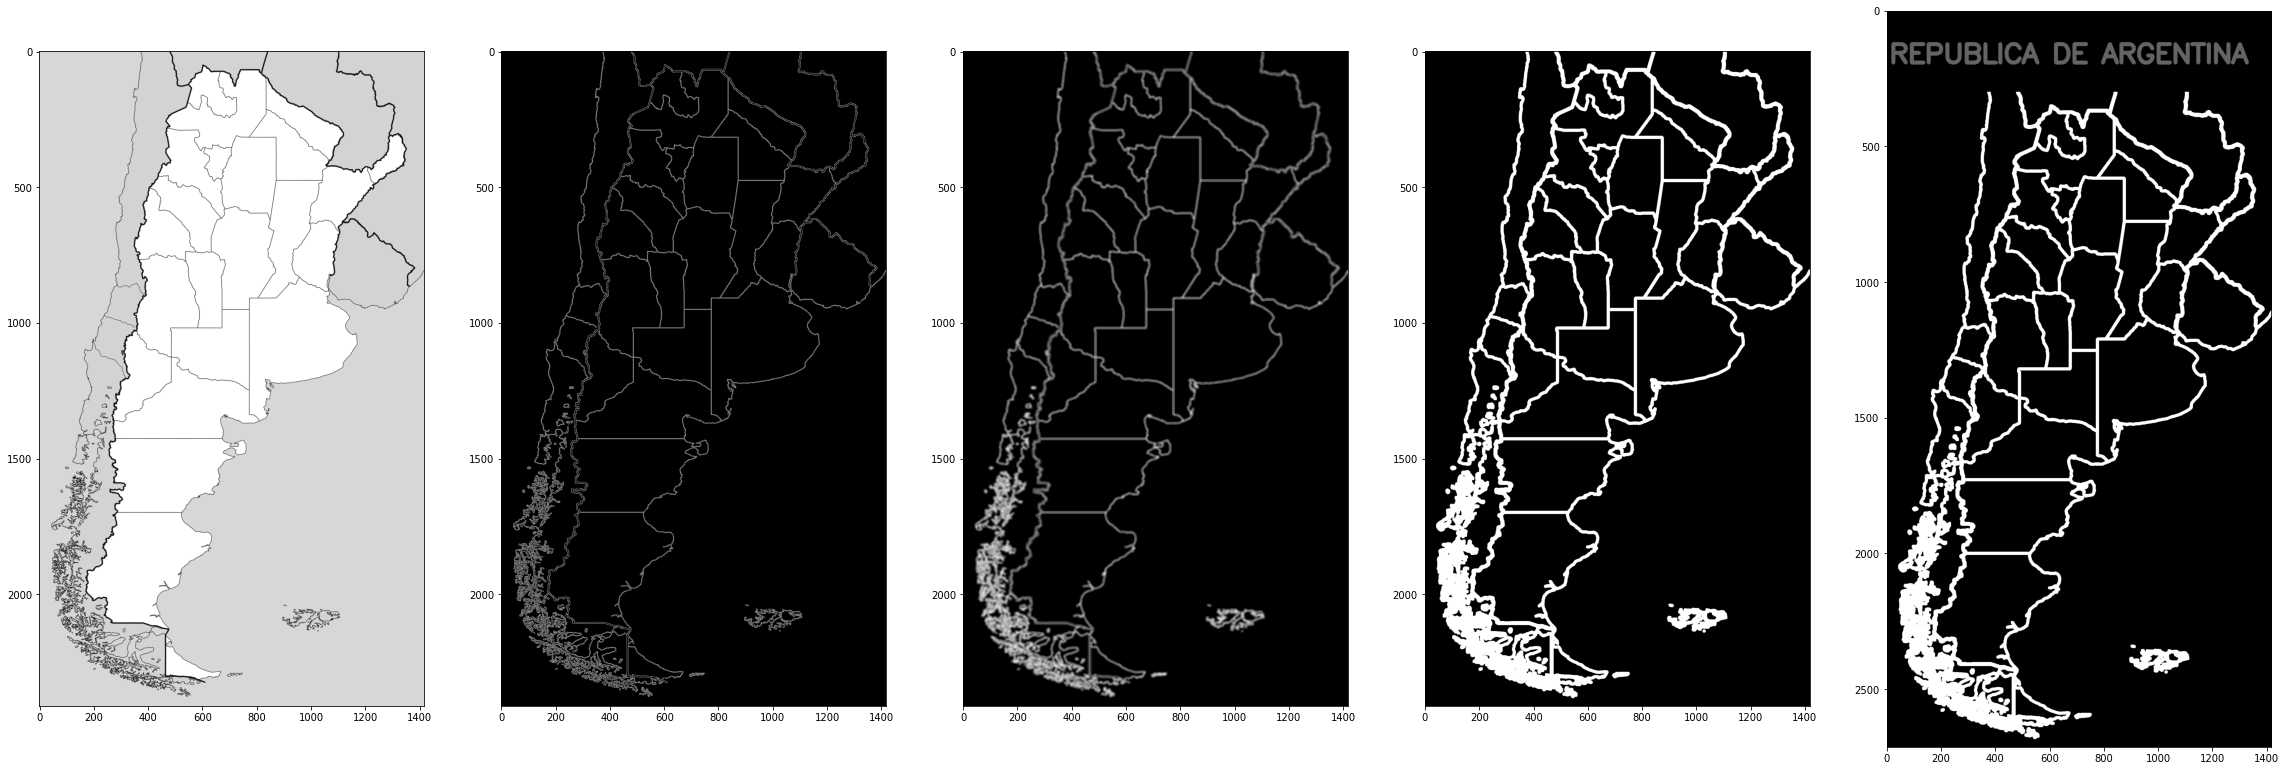

In [3]:
imagen = cv2.imread('/content/drive/MyDrive/PDI - Trabajo de Aplicación - Mapa a CAD - Bartezaghi, López/Imágenes/Argentina_politico_sin_rios.png', cv2.IMREAD_GRAYSCALE)
bordes = cv2.Canny(imagen,200,255) # El mapa es tan simple que con cualquier parámetro Canny segmenta bien
bordes_filt = cv2.blur(bordes,(10,10)) # Mientras mayor es el filtro, más borde tiene la imagen y más suave es la malla del stl
bordes_umb = bordes_filt.copy()
bordes_umb[bordes_umb <= 10] = 0
bordes_umb[bordes_umb > 10] = 255

bordes_txt = bordes_umb.copy()
rect_ceros = np.zeros((bordes_txt.shape[0]//8,bordes_txt.shape[1]))
bordes_txt = np.vstack((rect_ceros, bordes_txt))
cv2.putText(bordes_txt, \
            str('REPUBLICA DE ARGENTINA'), \
            (10,bordes_txt.shape[0]//14), \
            0, \
            1.8*bordes_txt.shape[0]/1500, \
            (100,100,100), \
            5*bordes_txt.shape[0]//1000, \
            cv2.FILLED)

fig, ax = plt.subplots(1,5,figsize=(40,40))
ax[0].imshow(imagen, cmap='gray')
ax[1].imshow(bordes, cmap='gray')
ax[2].imshow(bordes_filt, cmap='gray')
ax[3].imshow(bordes_umb, cmap='gray')
ax[4].imshow(bordes_txt, cmap='gray')

cv2.imwrite('Argentina_sin_rios_Canny.png', bordes_txt)

## Funciones blanco y negro

True

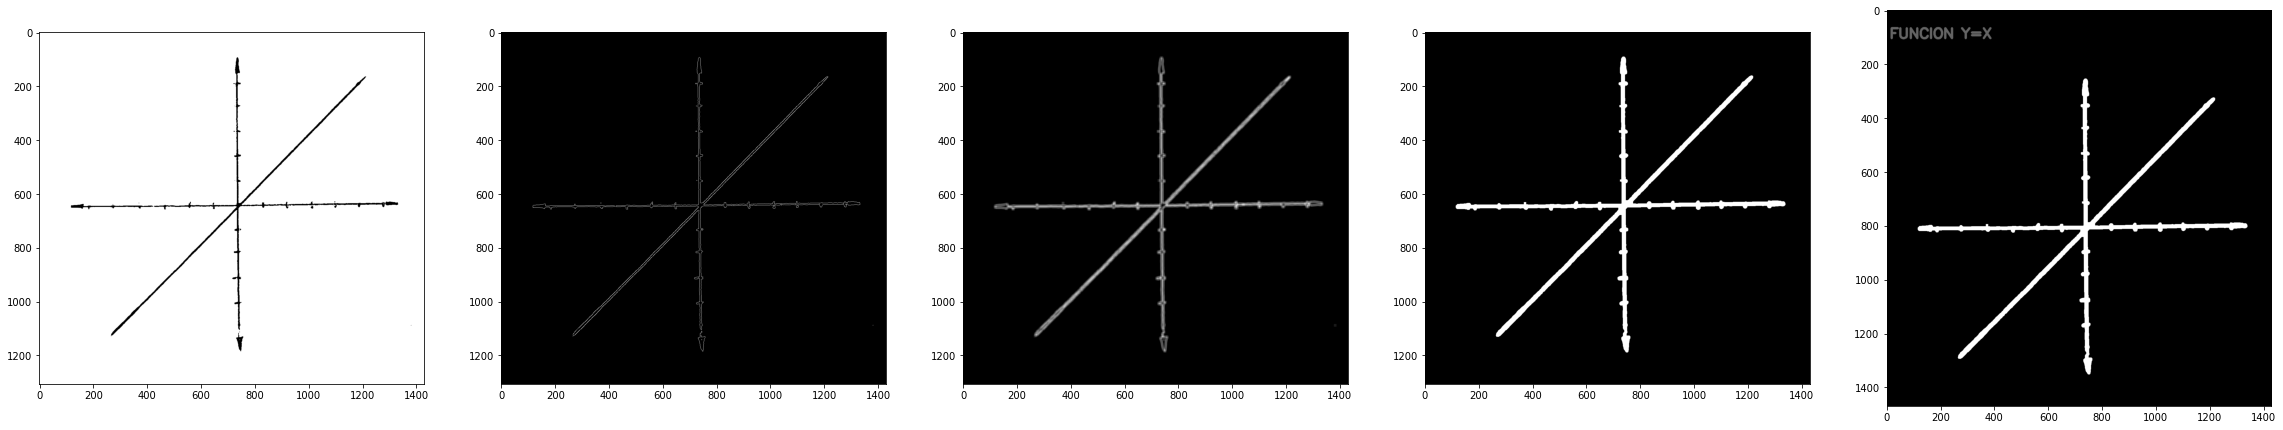

In [4]:
imagen = cv2.imread('/content/drive/MyDrive/PDI - Trabajo de Aplicación - Mapa a CAD - Bartezaghi, López/Imágenes/funcion1.jpg', cv2.IMREAD_GRAYSCALE)
imagen[imagen <= 75] = 0
imagen[imagen > 75] = 255
bordes = cv2.Canny(imagen,255,255)
bordes_filt = cv2.blur(bordes, (10,10))
bordes_umb = bordes_filt.copy()
bordes_umb[bordes_umb <= 10] = 0
bordes_umb[bordes_umb > 10] = 255
ee = cv2.getStructuringElement(0, (3,3))
bordes_umb = cv2.morphologyEx(bordes_umb, 3, ee, iterations=3)

bordes_txt = bordes_umb.copy()
rect_ceros = np.zeros((bordes_txt.shape[0]//8,bordes_txt.shape[1]))
bordes_txt = np.vstack((rect_ceros, bordes_txt))
cv2.putText(bordes_txt, \
            str('FUNCION Y=X'), \
            (10,bordes_txt.shape[0]//14), \
            0, \
            1.8*bordes_txt.shape[0]/1500, \
            (100,100,100), \
            5*bordes_txt.shape[0]//1000, \
            cv2.FILLED)

fig, ax = plt.subplots(1,5,figsize=(40,40))
ax[0].imshow(imagen, cmap='gray')
ax[1].imshow(bordes, cmap='gray')
ax[2].imshow(bordes_filt, cmap='gray')
ax[3].imshow(bordes_umb, cmap='gray')
ax[4].imshow(bordes_txt, cmap='gray')

cv2.imwrite('funcion1_canny.png', bordes_txt)

True

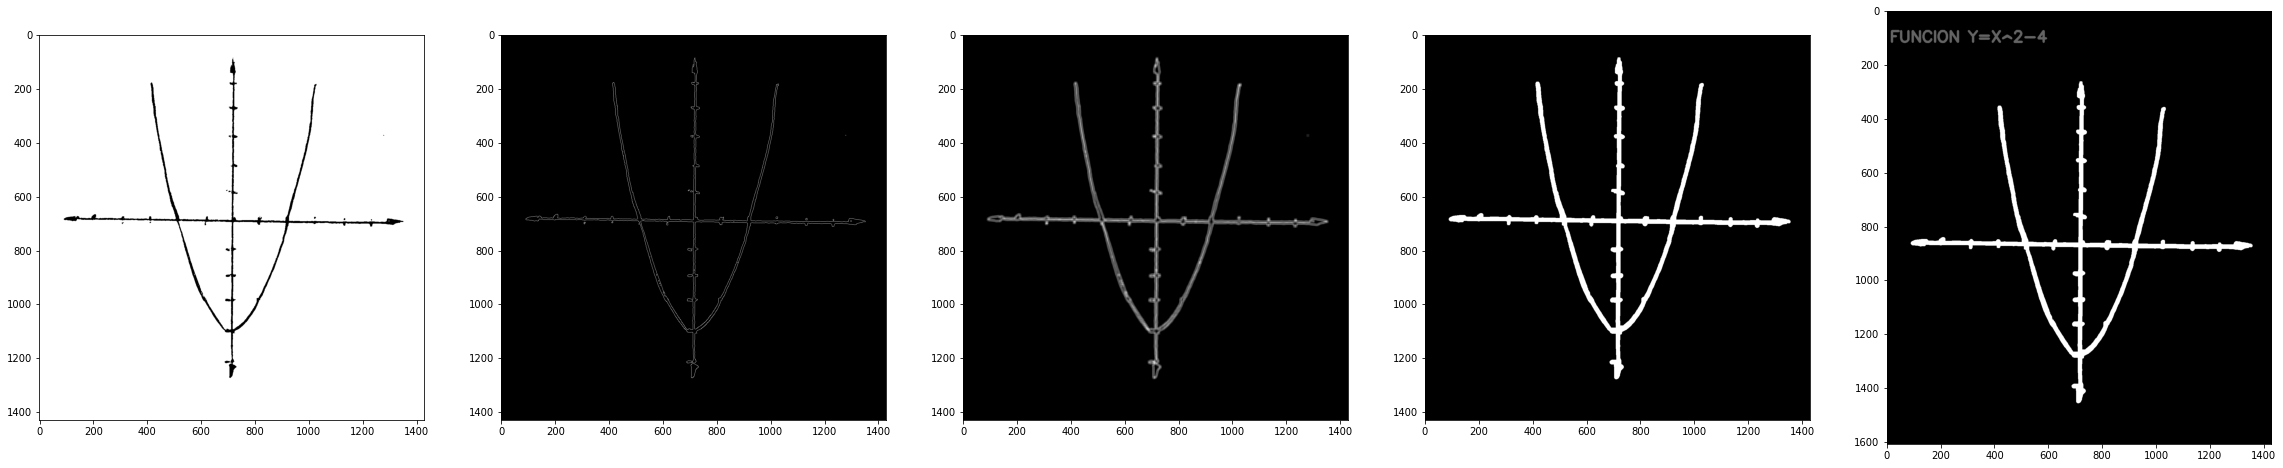

In [5]:
imagen = cv2.imread('/content/drive/MyDrive/PDI - Trabajo de Aplicación - Mapa a CAD - Bartezaghi, López/Imágenes/funcion2.jpg', cv2.IMREAD_GRAYSCALE)
imagen[imagen <= 75] = 0
imagen[imagen > 75] = 255
bordes = cv2.Canny(imagen,255,255)
bordes_filt = cv2.blur(bordes, (10,10))
bordes_umb = bordes_filt.copy()
bordes_umb[bordes_umb <= 10] = 0
bordes_umb[bordes_umb > 10] = 255
ee = cv2.getStructuringElement(0, (3,3))
bordes_umb = cv2.morphologyEx(bordes_umb, 3, ee, iterations=5)

bordes_txt = bordes_umb.copy()
rect_ceros = np.zeros((bordes_txt.shape[0]//8,bordes_txt.shape[1]))
bordes_txt = np.vstack((rect_ceros, bordes_txt))
cv2.putText(bordes_txt, \
            str('FUNCION Y=X^2-4'), \
            (10,bordes_txt.shape[0]//14), \
            0, \
            1.8*bordes_txt.shape[0]/1500, \
            (100,100,100), \
            5*bordes_txt.shape[0]//1000, \
            cv2.FILLED)

fig, ax = plt.subplots(1,5,figsize=(40,40))
ax[0].imshow(imagen, cmap='gray')
ax[1].imshow(bordes, cmap='gray')
ax[2].imshow(bordes_filt, cmap='gray')
ax[3].imshow(bordes_umb, cmap='gray')
ax[4].imshow(bordes_txt, cmap='gray')

cv2.imwrite('funcion2_canny.png', bordes_txt)

## Función a color
Segmentación de rojo, verde y azul

<BarContainer object of 180 artists>

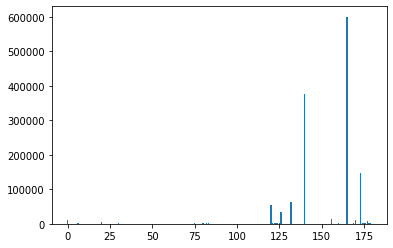

In [6]:
imagen = cv2.imread('/content/drive/MyDrive/PDI - Trabajo de Aplicación - Mapa a CAD - Bartezaghi, López/Imágenes/funcion3.jpg')
imagenHSV = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
imagenH = imagenHSV[:,:,0]
plt.bar(np.arange(180),cv2.calcHist([imagenH], [0], None, [180], [0,180])[:,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


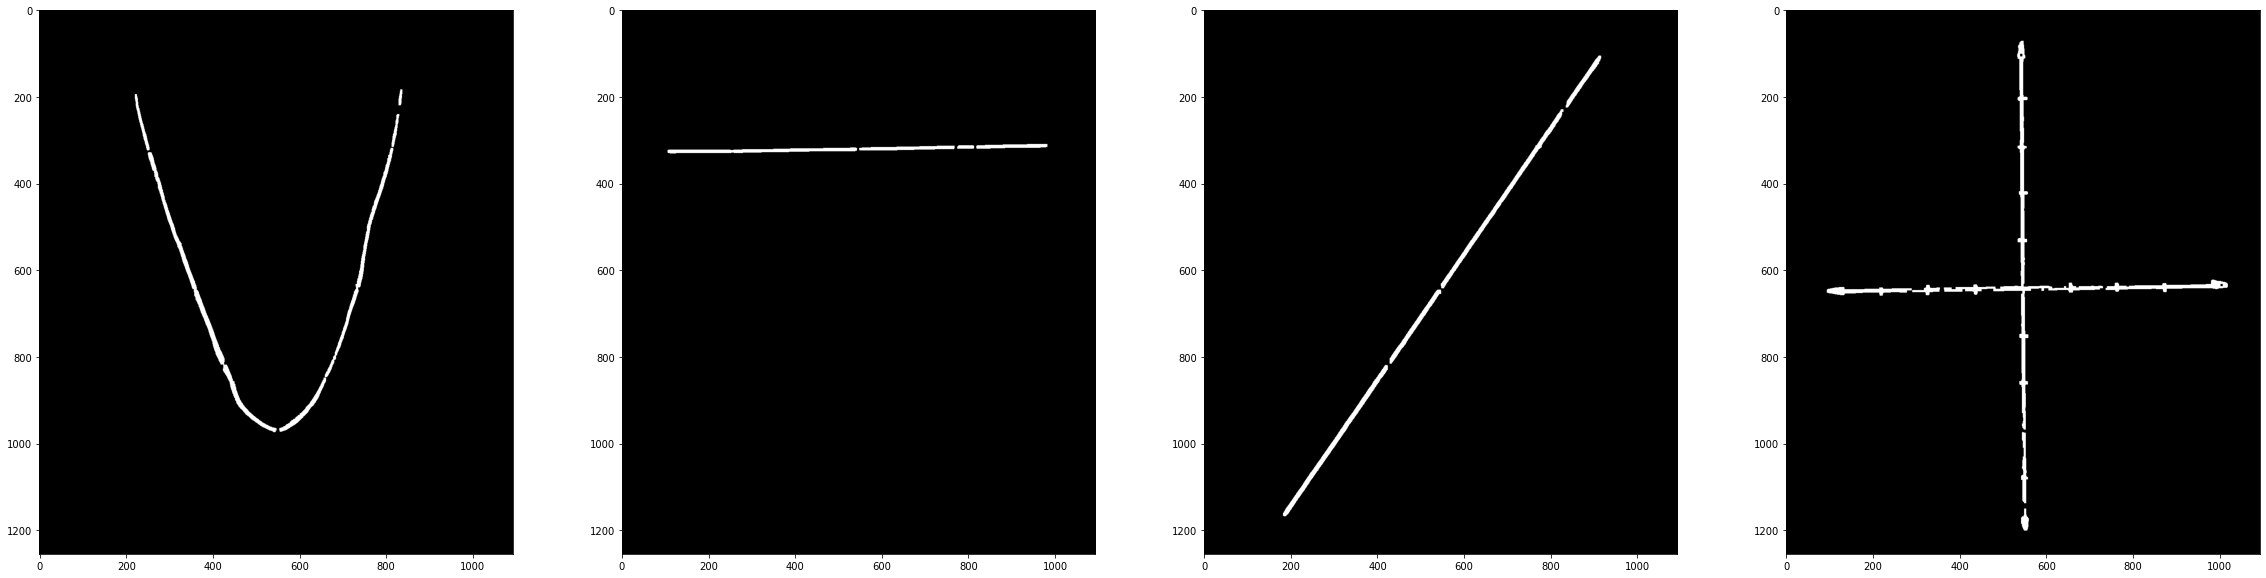

In [7]:
imagen = cv2.imread('/content/drive/MyDrive/PDI - Trabajo de Aplicación - Mapa a CAD - Bartezaghi, López/Imágenes/funcion3.jpg')
imagenHSV = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
ee = cv2.getStructuringElement(0, (5,5))

# Segmentación de Rojo
minH = 175
maxH = 179
minS = 100
maxS = 255
minV = 100
maxV = 255
canalH = cv2.inRange(imagenHSV[...,0], minH, maxH)
canalS = cv2.inRange(imagenHSV[...,1], minS, maxS)
canalV = cv2.inRange(imagenHSV[...,2], minV, maxV)
mascara_r = np.multiply(canalH, canalS)
mascara_r = np.multiply(mascara_r, canalV)
mascara_r = cv2.merge([mascara_r, mascara_r, mascara_r])
mascara_r[mascara_r == 255] = 1
mascara_r = cv2.morphologyEx(mascara_r, 3, ee, iterations=2)
mascara_r = cv2.blur(mascara_r.astype(np.float64),(5,5))
mascara_r[mascara_r < 0.01] = 0
mascara_r[mascara_r >= 0.01] = 1

# Segmentación de Verde
minH = 50
maxH = 90
minS = 50
maxS = 255
minV = 50
maxV = 255
canalH = cv2.inRange(imagenHSV[...,0], minH, maxH)
canalS = cv2.inRange(imagenHSV[...,1], minS, maxS)
canalV = cv2.inRange(imagenHSV[...,2], minV, maxV)
mascara_g = np.multiply(canalH, canalS)
mascara_g = np.multiply(mascara_g, canalV)
mascara_g = cv2.merge([mascara_g, mascara_g, mascara_g])
mascara_g[mascara_g == 255] = 1
mascara_g = cv2.morphologyEx(mascara_g, 3, ee, iterations=2)
mascara_g = cv2.blur(mascara_g.astype(np.float64),(5,5))
mascara_g[mascara_g < 0.01] = 0
mascara_g[mascara_g >= 0.01] = 1

# Segmentación de Azul
minH = 100
maxH = 130
minS = 50
maxS = 255
minV = 50
maxV = 255
canalH = cv2.inRange(imagenHSV[...,0], minH, maxH)
canalS = cv2.inRange(imagenHSV[...,1], minS, maxS)
canalV = cv2.inRange(imagenHSV[...,2], minV, maxV)
mascara_b = np.multiply(canalH, canalS)
mascara_b = np.multiply(mascara_b, canalV)
mascara_b = cv2.merge([mascara_b, mascara_b, mascara_b])
mascara_b[mascara_b == 255] = 1
mascara_b = cv2.morphologyEx(mascara_b, 3, ee, iterations=2)
mascara_b = cv2.blur(mascara_b.astype(np.float64),(5,5))
mascara_b[mascara_b < 0.01] = 0
mascara_b[mascara_b >= 0.01] = 1

# Segmentación de Negro
minH = 150
maxH = 179
minS = 0
maxS = 55
minV = 0
maxV = 100
canalH = cv2.inRange(imagenHSV[...,0], minH, maxH)
canalS = cv2.inRange(imagenHSV[...,1], minS, maxS)
canalV = cv2.inRange(imagenHSV[...,2], minV, maxV)
mascara_k = np.multiply(canalH, canalS)
mascara_k = np.multiply(mascara_k, canalV)
mascara_k = cv2.merge([mascara_k, mascara_k, mascara_k])
mascara_k[mascara_k == 255] = 1
mascara_k = cv2.morphologyEx(mascara_k, 3, ee, iterations=2)
mascara_k = cv2.blur(mascara_k.astype(np.float64),(5,5))
mascara_k[mascara_k < 0.01] = 0
mascara_k[mascara_k >= 0.01] = 1

fig, ax = plt.subplots(1,4,figsize=(40,10))


ax[0].imshow(255*mascara_r, cmap='gray')
ax[1].imshow(255*mascara_g, cmap='gray')
ax[2].imshow(255*mascara_b, cmap='gray')
ax[3].imshow(255*mascara_k, cmap='gray')

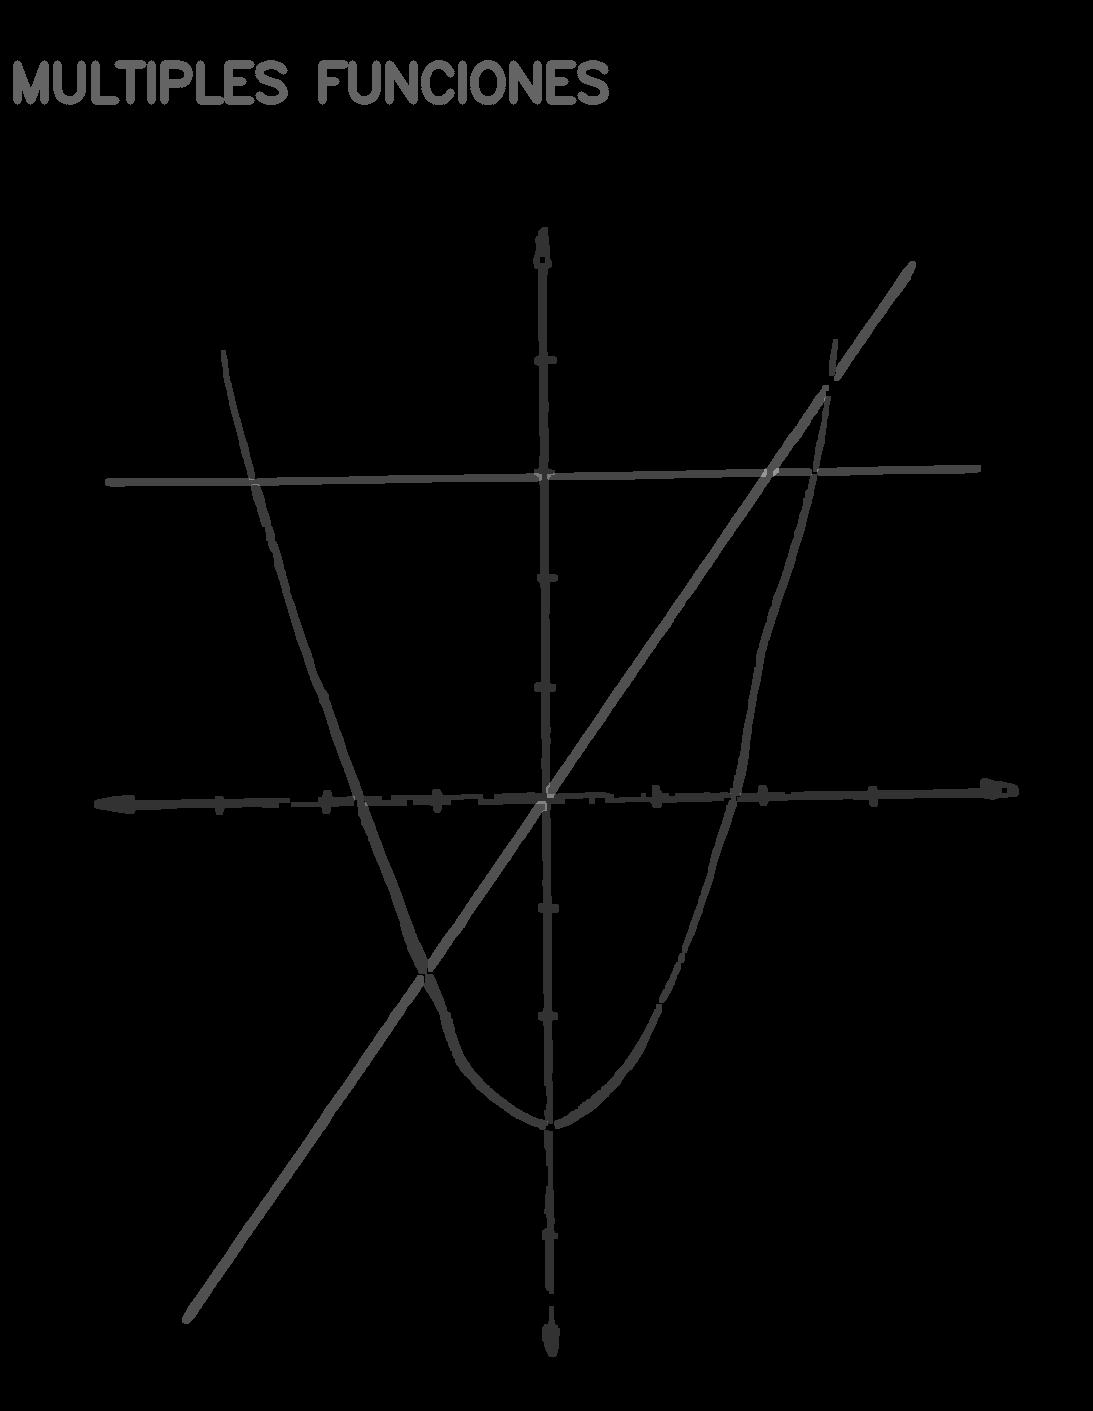

True

In [8]:
imagen_i = np.zeros_like(mascara_r)
imagen_i = np.add(imagen_i, mascara_k*50)
imagen_i = np.add(imagen_i, mascara_r*60)
imagen_i = np.add(imagen_i, mascara_g*70)
imagen_i = np.add(imagen_i, mascara_b*80)
imagen_i = cv2.cvtColor(imagen_i.astype(np.uint8), cv2.COLOR_BGR2GRAY)

imagen_i_txt = imagen_i.copy()
rect_ceros = np.zeros((imagen_i_txt.shape[0]//8,imagen_i_txt.shape[1]))
imagen_i_txt = np.vstack((rect_ceros, imagen_i_txt))
cv2.putText(imagen_i_txt, \
            str('MULTIPLES FUNCIONES'), \
            (10,imagen_i_txt.shape[0]//14), \
            0, \
            1.8*imagen_i_txt.shape[0]/1500, \
            (100,100,100), \
            5*imagen_i_txt.shape[0]//1000, \
            cv2.FILLED)
cv2_imshow(imagen_i_txt)

cv2.imwrite("funcion3_gris.png", imagen_i_txt)

# Mapa Relieve

## Segmentación agua tierra

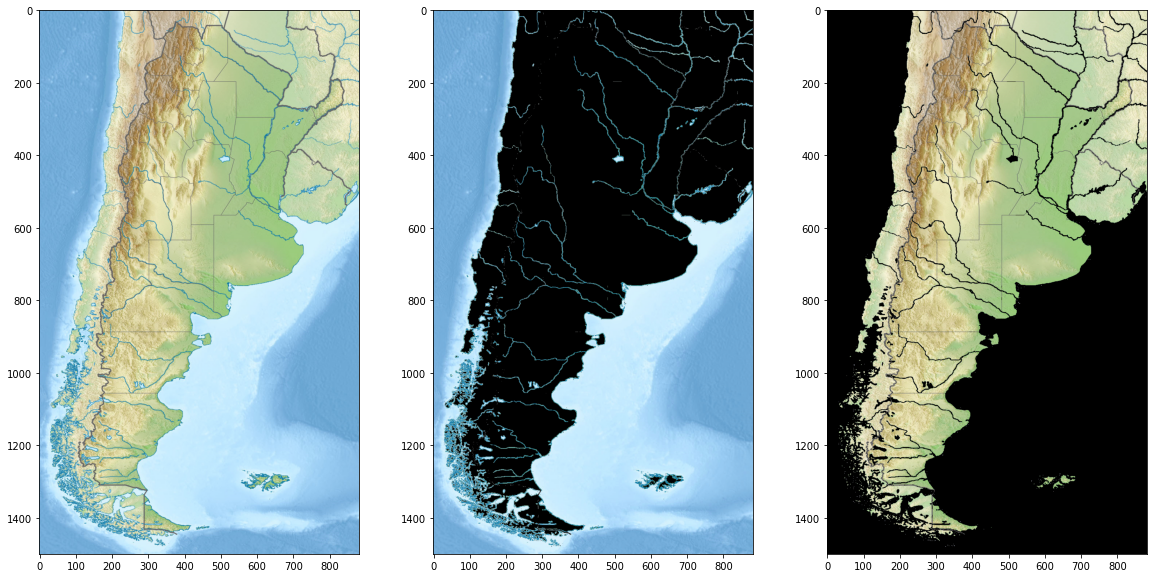

In [9]:
imagen = cv2.imread('/content/drive/MyDrive/PDI - Trabajo de Aplicación - Mapa a CAD - Bartezaghi, López/Imágenes/Argentina_relief.jpg')
imagenHSV = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

minH = 70
maxH = 110
minS = 0
maxS = 255
minV = 0
maxV = 255

canalH = cv2.inRange(imagenHSV[...,0], minH, maxH)
canalS = cv2.inRange(imagenHSV[...,1], minS, maxS)
canalV = cv2.inRange(imagenHSV[...,2], minV, maxV)

mascara_agua = np.multiply(canalH, canalS, canalV)
mascara_agua = cv2.merge([mascara_agua, mascara_agua, mascara_agua])
mascara_agua[mascara_agua == 255] = 1
mascara_tierra = np.subtract(np.ones_like(mascara_agua),mascara_agua)

imagen_seg_agua = np.multiply(imagenHSV, mascara_agua)
imagen_seg_agua = cv2.cvtColor(imagen_seg_agua, cv2.COLOR_HSV2BGR)
imagen_seg_tierra = np.multiply(imagenHSV, mascara_tierra)
imagen_seg_tierra = cv2.cvtColor(imagen_seg_tierra, cv2.COLOR_HSV2BGR)

fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(imagen[...,::-1])
ax[1].imshow(imagen_seg_agua[...,::-1])
ax[2].imshow(imagen_seg_tierra[...,::-1])

True

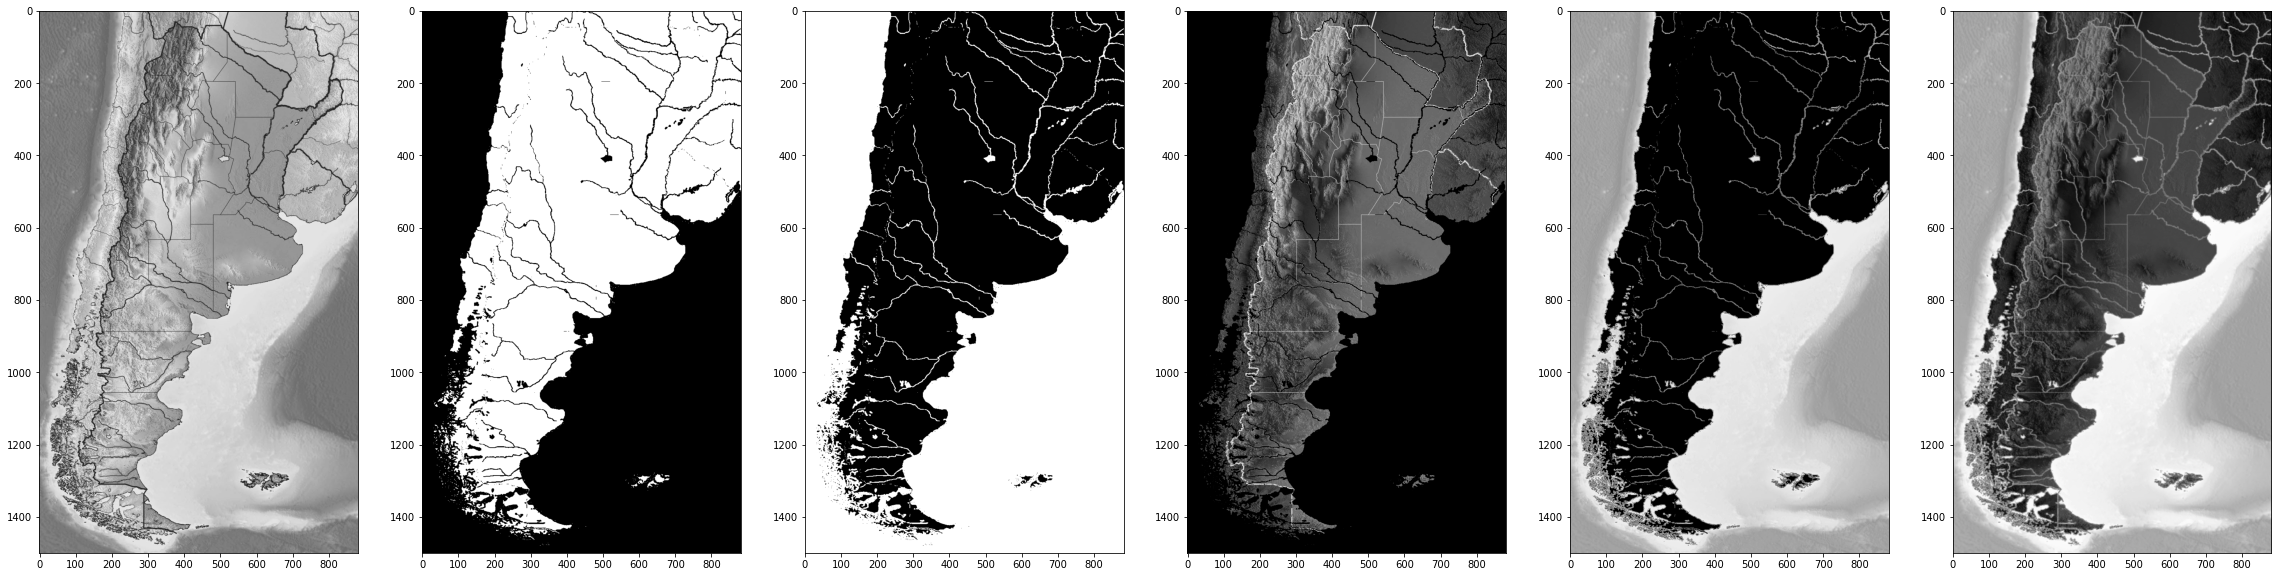

In [10]:
imagen_relief = cv2.imread('/content/drive/MyDrive/PDI - Trabajo de Aplicación - Mapa a CAD - Bartezaghi, López/Imágenes/Argentina_relief.jpg', cv2.IMREAD_GRAYSCALE)

mascara_tierra_byn = mascara_tierra[...,0]
mascara_agua_byn = mascara_agua[...,0]

imagen_relief_inv = 255 - np.multiply(imagen_relief,mascara_tierra_byn)
imagen_relief_inv[imagen_relief_inv == 255] = 0

imagen_relief_agua = np.multiply(imagen_relief,mascara_agua_byn)


imagen_relief_alturas = np.add(imagen_relief_inv,imagen_relief_agua)
imagen_relief_alturas = cv2.blur(imagen_relief_alturas,(3,3))


fig, ax = plt.subplots(1,6,figsize=(40,20))
ax[0].imshow(imagen_relief, cmap='gray')
ax[1].imshow(mascara_tierra_byn, cmap='gray')
ax[2].imshow(mascara_agua_byn, cmap='gray')
ax[3].imshow(imagen_relief_inv, cmap='gray')
ax[4].imshow(imagen_relief_agua, cmap='gray')
ax[5].imshow(imagen_relief_alturas, cmap='gray')

cv2.imwrite('Argentina_relieve_seg_color.png', imagen_relief_alturas)

##Segmentación de bordes

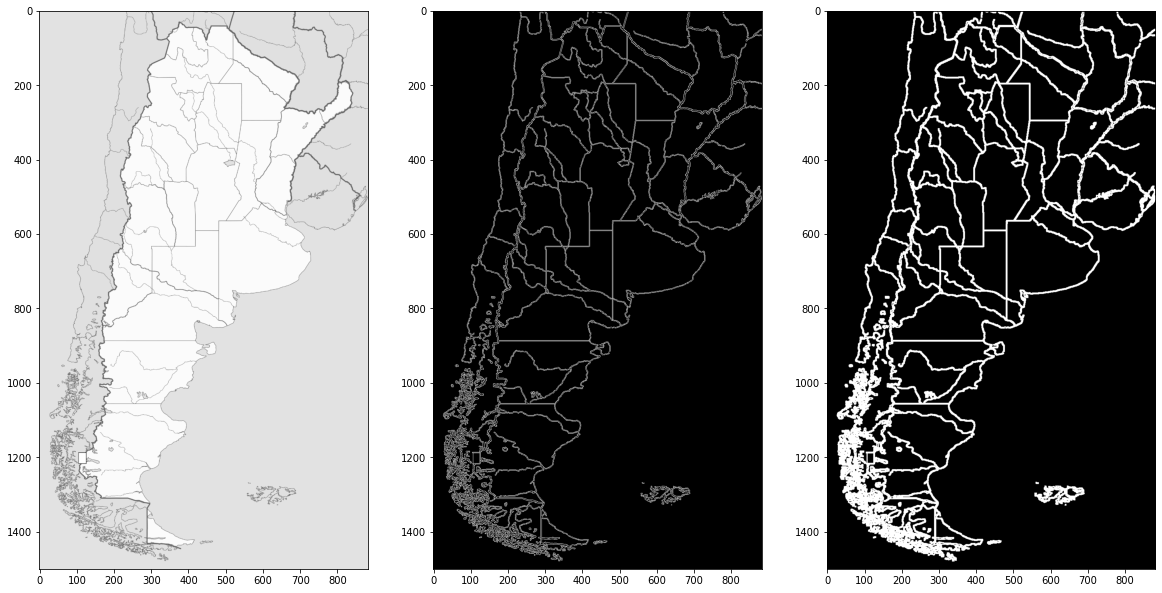

In [11]:
imagen_gris = cv2.imread('/content/drive/MyDrive/PDI - Trabajo de Aplicación - Mapa a CAD - Bartezaghi, López/Imágenes/Argentina_politico.png', cv2.IMREAD_GRAYSCALE)

imagen_gris = cv2.resize(imagen_gris,(imagen_relief_alturas.shape[1],imagen_relief_alturas.shape[0]))

bordes = cv2.Canny(imagen_gris,200,255) # El mapa es tan simple que con cualquier parámetro Canny segmenta bien
bordes_filt = cv2.blur(bordes,(3,3)) # Mientras mayor es el filtro, más borde tiene la imagen y más suave es la malla del stl
bordes_umb = bordes_filt.copy()
bordes_umb[bordes_umb <= 10] = 0
bordes_umb[bordes_umb > 10] = 255


fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(imagen_gris, cmap='gray')
ax[1].imshow(bordes, cmap='gray')
# ax[1].imshow(bordes_filt, cmap='gray')
ax[2].imshow(bordes_umb, cmap='gray')


# cv2.imwrite('Argentina_relieve_seg_color.png', relieve_y_alturas_mask)

##Imagen de relieve y bordes

True

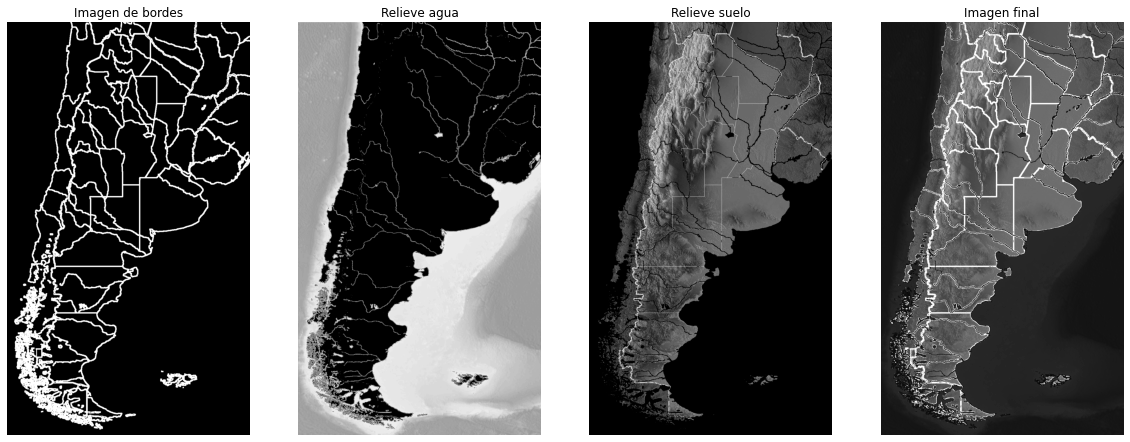

In [12]:
def escalar_intensidad_grises(imagen_gris,a,b):
    imagen_gris = cv2.normalize(imagen_gris, None, a, b, cv2.NORM_MINMAX, cv2.CV_8UC1)
    return imagen_gris


imagen_relief_agua = np.uint(imagen_relief_agua)


imagen_relief_inv = np.uint(imagen_relief_inv)
bordes_umb = np.uint(bordes_umb)

umbral_min_agua = 0
umbral_max_agua = 60
umbral_min_relieve = 61
umbral_max_relieve = 200

imagen_relief_agua = escalar_intensidad_grises(imagen_relief_agua,umbral_min_agua,umbral_max_agua)
imagen_relief_inv = escalar_intensidad_grises(imagen_relief_inv,umbral_min_relieve,umbral_max_relieve)

imagen_final = imagen_relief_inv.copy()
for i in range(imagen_final.shape[0]):
  for j in range(imagen_final.shape[1]):
    if(bordes_umb[i,j]==255):
      if(imagen_relief_agua[i,j]!=umbral_min_agua):
        imagen_final[i,j]= imagen_relief_agua[i,j]  #En caso de borde y rio, nos quedamos con rio
      
      if(imagen_relief_agua[i,j]==umbral_min_agua):  #bordes sin agua
        imagen_final[i,j] = bordes_umb[i,j]

    if(bordes_umb[i,j]!=255):  #Si no estamos en borde
      if(imagen_relief_inv[i,j]==umbral_min_relieve): #Si no estamos en relieve tampoco
        imagen_final[i,j] = imagen_relief_agua[i,j]
      else:
        imagen_final[i,j] = imagen_relief_inv[i,j]


imagen_final = np.clip(imagen_final,0,255)



imagen_final_txt = imagen_final.copy()
rect_ceros = np.zeros((imagen_final_txt.shape[0]//8,imagen_final_txt.shape[1]))
imagen_final_txt = np.vstack((rect_ceros, imagen_final_txt))
cv2.putText(imagen_final_txt, \
            str('ARGENTINA RELIEVE'), \
            (10,imagen_final_txt.shape[0]//14), \
            0, \
            1.8*imagen_final_txt.shape[0]/1500, \
            (100,100,100), \
            5*imagen_final_txt.shape[0]//1000, \
            cv2.FILLED)

fig, ax = plt.subplots(1,4,figsize=(20,20))


ax[0].imshow(bordes_umb, cmap='gray')
ax[0].title.set_text('Imagen de bordes')
ax[0].axis('off')

ax[1].imshow(imagen_relief_agua, cmap='gray')
ax[1].title.set_text('Relieve agua')
ax[1].axis('off')

ax[2].imshow(imagen_relief_inv, cmap='gray')
ax[2].title.set_text('Relieve suelo')
ax[2].axis('off')

ax[3].imshow(imagen_final, cmap='gray')
ax[3].title.set_text('Imagen final')
ax[3].axis('off')
# ax[4].imshow(imagen_final_txt, cmap='gray')
# ax[4].title.set_text('Imagen con Titulo')


cv2.imwrite('Argentina_relieve_seg_color2.png', imagen_final_txt)


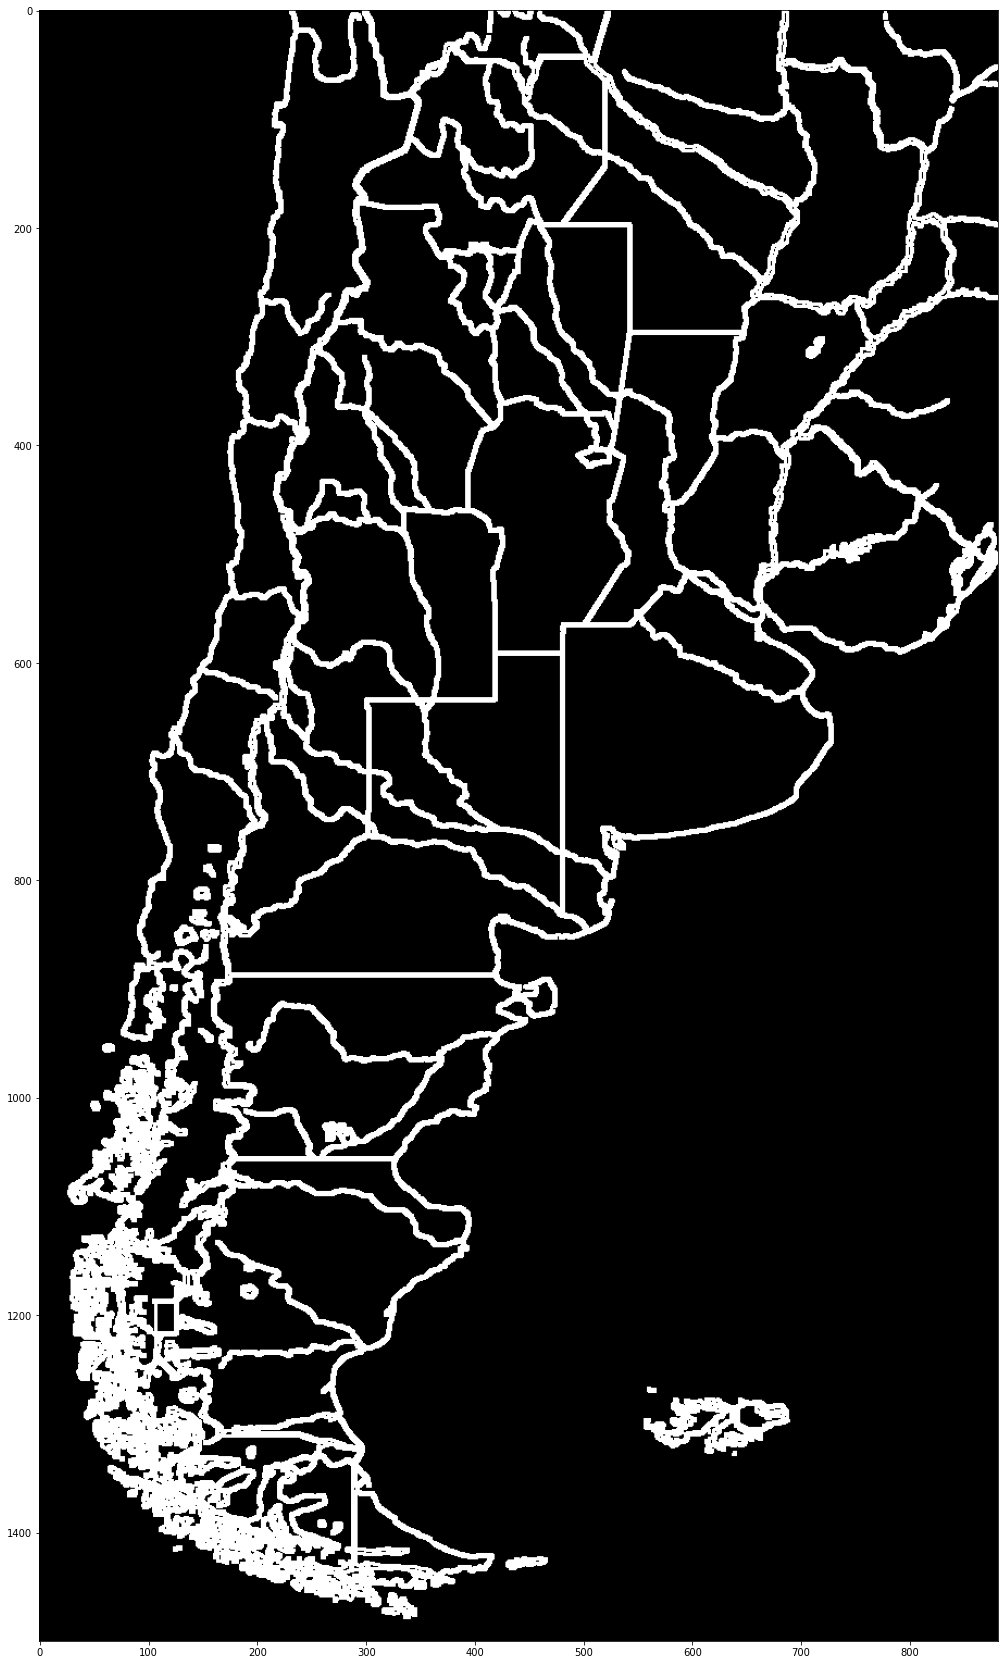

In [13]:
plt.figure(figsize=(30,30))
plt.imshow(bordes_umb,cmap='gray')

# img2stl

In [14]:
!python3 /content/drive/MyDrive/PDI\ -\ Trabajo\ de\ Aplicación\ -\ Mapa\ a\ CAD\ -\ Bartezaghi,\ López/img2stl-master/makestl.py funcion3_gris.png funcion3_gris.stl

Parámetros de las funciones en makestl.py

prepareImg:
* height (int) = altura de la imagen, se normaliza por este valor
* filter_radius (int) = radio del filtro gaussiano que se aplica a la imagen, no es conveniente utilizarlo, se agrandan los picos en los bordes
* crop (bool) = aplica un recorte al fondo, no funciona
* invert (bool) = aplica el negativo a la imagen 
* compress (bool) = comprime la imagen, no funciona

to_mesh:
* depth (int) = profundidad del fondo de la imagen, con 10 tiene una buena base
* double (bool) = duplica la malla del otro lado de la base (no nos sirve)
* _ascii (bool) = escribir el archivo stl en ascii en lugar de binario


In [15]:
#!python3 /content/drive/MyDrive/PDI\ -\ Trabajo\ de\ Aplicación\ -\ Mapa\ a\ CAD\ -\ Bartezaghi,\ López/img2stl-master/makestl.py Santa_Fe_sin_agua_Canny.png Santa_Fe.stl
#!python3 /content/drive/MyDrive/PDI\ -\ Trabajo\ de\ Aplicación\ -\ Mapa\ a\ CAD\ -\ Bartezaghi,\ López/img2stl-master/makestl.py Argentina_sin_rios_Canny.png Argentina.stl

#!python3 /content/drive/MyDrive/PDI\ -\ Trabajo\ de\ Aplicación\ -\ Mapa\ a\ CAD\ -\ Bartezaghi,\ López/img2stl-master/makestl.py funcion1_canny.png funcion1.stl
#!python3 /content/drive/MyDrive/PDI\ -\ Trabajo\ de\ Aplicación\ -\ Mapa\ a\ CAD\ -\ Bartezaghi,\ López/img2stl-master/makestl.py funcion2_canny.png funcion2.stl
#!python3 /content/drive/MyDrive/PDI\ -\ Trabajo\ de\ Aplicación\ -\ Mapa\ a\ CAD\ -\ Bartezaghi,\ López/img2stl-master/makestl.py funcion3_gris.png funcion3.stl